In [13]:
%matplotlib widget

In [7]:
from pathlib import Path
import nmrespy as ne

data_path = Path("../../data/camphor/1")

output_dir = Path("output")
if not output_dir.is_dir():
    output_dir.mkdir()

estimator_path = output_dir / "estimator.pkl"
if estimator_path.is_file():
    estimator = ne.Estimator2DJ.from_pickle(estimator_path)
else:
    estimator = ne.Estimator2DJ.new_bruker(data_path)
    estimator.phase_data(p0=5.238, p1=-6.262)
    estimator.baseline_correction()

In [8]:
import numpy as np

np.random.seed(0)
print(estimator._results)
try:
    estimator.get_results()
except ValueError:
    regions = [
        (2.55, 2.475),
        (2.35, 2.23),
        (2.09, 2.025),
        (1.95, 1.75),
        (1.7, 1.61),
        (1.375, 1.215),
    ]
    
    estimate_kwargs = dict(
        noise_region=(5.25, 5.21),
        region_unit="ppm",
        max_iterations=100,
        nlp_trim=2048,
        check_neg_amps_every=25,
    )
    for region in regions:
        estimator.estimate(region=region, **estimate_kwargs)
        estimator.to_pickle(estimator_path, force_overwrite=True)

[]
┌────────────────────────────────────────┐
│ESTIMATING REGION: 2.55 - 2.475 ppm (F2)│
└────────────────────────────────────────┘
┌─────────────┐
│MMEMP STARTED│
└─────────────┘
--> Computing number of oscillators...
	Number of oscillators will be estimated using MDL on first t1 increment.
	Number of oscillators: 6
--> Pencil parameters: 64, 34
--> Enhanced Block Hankel matrix constructed:
	Size: 2176 x 2275
	Memory: 75.5371MiB
--> Performing Singular Value Decomposition...
--> Checking for oscillators with negative damping...
	None found
┌──────────────┐
│MMEMP COMPLETE│
└──────────────┘
Time elapsed: 0 mins, 2 secs, 571 msecs
┌────────────────────┐
│OPTIMISATION STARTED│
└────────────────────┘
┌───────────────────────────┐
│TRUST NCG ALGORITHM STARTED│
└───────────────────────────┘
┌───────┬──────────────┬──────────────┬──────────────┐
│ Iter. │  Objective   │  Grad. Norm  │ Trust Radius │
├───────┼──────────────┼──────────────┼──────────────┤
│ 0     │ 0.410373     │ 68.3457      

1.2310722639418934
[[np.float64(2.5154721924284575), np.float64(2.511670953200287), np.float64(2.50777069898436), np.float64(2.5040589395429604), np.float64(2.500491328794604)], [np.float64(2.295595646572895)], [np.float64(2.0585610278109767)], [np.float64(1.884189033282033), np.float64(1.8078054906634888)], [np.float64(1.6698204113501454), np.float64(1.6578565956049742)], [np.float64(1.3266110831267934), np.float64(1.3143060265517106), np.float64(1.2986885569814786), np.float64(1.2828919214135126), np.float64(1.2706758236526343)]]


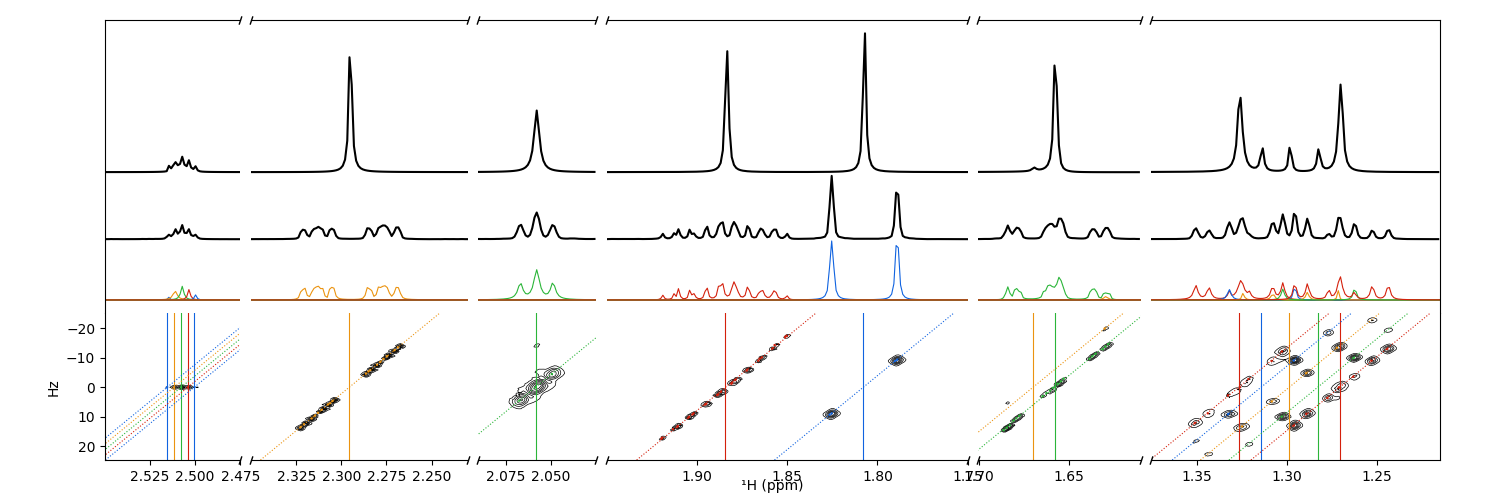

In [17]:
mp_thold = 2.0 * estimator.sw()[1] / estimator.default_pts[1]
print(mp_thold)
def plot_result(estimator):
    fig, ax = estimator.plot_result(
        region_unit="ppm",
        multiplet_thold=mp_thold,
        multiplet_lw=0.8,
        figsize=(15.0, 5.0),
    )
    return fig, ax

fig, _ = plot_result(estimator)